# ![.right](https://lh6.ggpht.com/wUrTIhpHPVqw_VPCdhbSiF5TXlBlLyRHdH1gsII_y5NkgYKzbbj7cC2l6AGoVq-JN0U=w100 "MSDS 7331 Data Mining - Project 1")


# Project 2: Classification

---



# Team Members

- Chris Woodard
- Claire Chu
- Nathan Mowat
- Bill Kerneckel

---


# Rubic

- [Data Preperation 1](#dp1) 

- [Data Preperation 2](#dp2)

- [Modeling and Evaluation 1](#me1)

- [Modeling and Evaluation 2](#me2)

- [Modeling and Evaluation 3](#me3)

- [Modeling and Evaluation 4](#me4)

- [Modeling and Evaluation 5](#me5)

- [Modeling and Evaluation 6](#me6)

- [Deployment](#d)

- [Exceptional Work](#ew)

- [Appendix](#a)

<hr>



# OBJECTIVE: 
Using the NASA human resources dataset, let's use the variables to predict future records:
- What kind of model can we use to predict a "junior salary range level" classification, given the variables we have?
- What kind of model can we use to predict a "caucasian" race classification, given the variables we have?

# Data Preperation 1

---

<span style="color:red">10 Points - Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.</span>

In [42]:
#load python libaries
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as pl
import seaborn as sns
import glob
import sys
import os
import warnings
import ggplot
import datetime
import time
from datetime import date

In [43]:
%matplotlib inline

In [46]:
#load data file
data_file = pd.read_excel('/Users/macnificent/desktop/NEW_NASA_2006.xlsx') 
data_file2 = pd.read_excel('/Users/macnificent/desktop/NEW_NASA_2007.xlsx') 
data_file3 = pd.read_excel('/Users/macnificent/desktop/NASA_2008.xlsx')
data_file4 = pd.read_excel('/Users/macnificent/desktop/NASA_2009.xlsx')
data_file5 = pd.read_excel('/Users/macnificent/desktop/NASA_2010.xlsx')
data_file6 = pd.read_excel('/Users/macnificent/desktop/NASA_2011.xlsx')
data_file7 = pd.read_excel('/Users/macnificent/desktop/NASA_2012.xlsx')
data_file8 = pd.read_excel('/Users/macnificent/desktop/NASA_2013.xlsx')
data_file9 = pd.read_excel('/Users/macnificent/desktop/NASA_2014.xlsx')
data_file10 = pd.read_excel('/Users/macnificent/desktop/NASA_2015.xlsx')
data_file11 = pd.read_excel('/Users/macnificent/desktop/NASA_2016.xlsx')

#you'll have to change the file path to your working directory

#removing 1st row from datasets
data_file.drop(0, axis = 0,inplace = True)
data_file2.drop(0, axis = 0,inplace = True)
data_file3.drop(0, axis = 0,inplace = True)
data_file4.drop(0, axis = 0,inplace = True)
data_file5.drop(0, axis = 0,inplace = True)
data_file6.drop(0, axis = 0,inplace = True)
data_file7.drop(0, axis = 0,inplace = True)
data_file8.drop(0, axis = 0,inplace = True)
data_file9.drop(0, axis = 0,inplace = True)
data_file10.drop(0, axis = 0,inplace = True)
data_file11.drop(0, axis = 0,inplace = True)

#note: please be patient as this will take a few minutes to run

In [47]:
#combining dataframes 
df = [data_file, data_file2, data_file3, data_file4, data_file5, data_file6, data_file7, data_file8, data_file9, data_file10, data_file11]

cdf = pd.concat(df, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
cdf.reset_index()

,index,Hist_yr,Unnamed: 28,agency,bdyr,coopsch,coopyr,currgrddte,dtystn_ind,dtystnname,...,sex,step_emp,supind,suplev,tenure,time_in_grade,tl,ttl,typappt,worksch
0,1,2006,NaN,NN51,1900,NaN,NaN,10/08/1989,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",...,F,9,8,34,1,205.46,NaN,NaN,10,F
1,2,2006,NaN,NN51,1980,NaN,NaN,09/22/2002,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",...,F,6,2,26,1,50.00,NaN,NaN,10,F
2,3,2006,NaN,NN23,1986,NaN,NaN,07/21/1996,88,"HAMPTON,HAMPTON,VIRGINIA",...,M,8,8,34,1,124.04,NaN,NaN,10,F
3,4,2006,NaN,NN64,1994,NaN,NaN,04/17/2005,88,"STENNIS SPACE CENTER, HANCOCK, MISSISSIPPI",...,M,2,2,26,1,19.17,NaN,NaN,10,F
4,5,2006,NaN,NN72,2006,NaN,NaN,07/23/2006,29,"HOUSTON,HARRIS,TEXAS",...,F,10,8,34,3,3.98,NaN,NaN,20,F
5,6,2006,NaN,NN62,1972,NaN,NaN,12/01/1997,32,"REDSTONE ARSENAL,MADISON,ALABAMA",...,M,6,8,34,1,107.69,NaN,NaN,10,F
6,7,2006,NaN,NN51,1900,NaN,NaN,02/27/2000,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",...,M,5,8,34,1,80.85,NaN,NaN,10,F
7,8,2006,NaN,NN72,1986,NaN,NaN,04/26/1998,29,"HOUSTON,HARRIS,TEXAS",...,M,6,8,34,1,102.88,NaN,NaN,10,F
8,9,2006,NaN,NN51,1978,NaN,NaN,09/27/1987,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",...,M,0,2,32,1,229.85,NaN,NaN,10,F
9,10,2006,NaN,NN10,1987,NaN,NaN,05/14/2006,80,"WASHINGTON,DISTRICT OF COLUMBIA",...,F,6,2,34,1,6.27,NaN,NaN,10,F


In [48]:
# dropping columns we are not using for the analysis
cdf.drop('Unnamed: 28', axis=1, inplace=True)
cdf.drop('agency', axis=1, inplace=True)
cdf.drop('coopsch', axis=1, inplace=True)
cdf.drop('coopyr', axis=1, inplace=True)
cdf.drop('dtystn_ind', axis=1, inplace=True)
cdf.drop('dtystnname', axis=1, inplace=True)
cdf.drop('edlev', axis=1, inplace=True)
cdf.drop('foulev', axis=1, inplace=True)
cdf.drop('fousch', axis=1, inplace=True)
cdf.drop('fouyr', axis=1, inplace=True)
cdf.drop('nasattl', axis=1, inplace=True)
cdf.drop('nasa', axis=1, inplace=True)
cdf.drop('nasat', axis=1, inplace=True)
cdf.drop('probenddte', axis=1, inplace=True)
cdf.drop('promontedte', axis=1, inplace=True)
cdf.drop('secsch', axis=1, inplace=True)
cdf.drop('seclev', axis=1, inplace=True)
cdf.drop('typappt', axis=1, inplace=True)
cdf.drop('tl', axis=1, inplace=True)
cdf.drop('ttl', axis=1, inplace=True)
cdf.drop('worksch', axis=1, inplace=True)

In [49]:
cdf = cdf[cdf.bdyr != 1900]
cdf.salary = cdf.salary.astype(np.float64)
cdf.time_in_grade = cdf.time_in_grade.astype(np.float64)
cdf.suplev = cdf.suplev.astype(np.float64)

In [50]:
# converting bdyr column to age
#now = datetime.datetime.now()
now = date(2016,12,31)
cdf['bdyr'] = cdf['bdyr'].apply(pd.to_numeric, errors='coerce') 
cdf['age'] = now.year - cdf['bdyr']

In [51]:
cdf['salary_range'] = pd.cut(cdf['salary'],[0,50000,100000,135000,150000],4,labels=['Entry_Level','Jr_Level','Mid_Level', 'Mgmt_Level'])
print(cdf['salary_range'].head())
cdf.dropna(inplace=True)

1     Jr_Level
2    Mid_Level
3     Jr_Level
4    Mid_Level
5     Jr_Level
Name: salary_range, dtype: category
Categories (4, object): [Entry_Level < Jr_Level < Mid_Level < Mgmt_Level]


In [52]:
cdf.salary.max() #Is the salary range cut-off still valid with the new data? Yes

149993.0

In [53]:
# convert cdf variable back to "df" nomenclature
df = pd.DataFrame(cdf)

In [54]:
#manipulate employee start date 'eoddte' to get 'service' variable
#convert 'eoddte' to series
df.eod = pd.Series(df['eoddte'])
#convert 'eoddte' series to 'eoddte' datetime
df['eoddte'] = pd.to_datetime(df.eod) 
#convert eod to be just the year
df['eodyr'] = df['eoddte'].map(lambda x: x.year)

In [55]:
#convert high school graduation year "hiyr" to be numeric
df['hiyr'] = df['hiyr'].apply(pd.to_numeric, errors='coerce')
#after looking at a crosstab, we can see that there are a lot of "high school graduation year: 0"
#this is a data entry error, let's remove these entries...
df = df[df.hiyr != 0]
pd.crosstab(index=df["hiyr"],columns="hiyr")
#now the 0 entries have been removed

#subtract employee hire date from high school graduation date to get exprience
df['experience'] = df['eodyr'] - df['hiyr']

In [56]:
#get the 'service' variable by subtracting current date from hire date
today = date(2016, 12, 31)

df['service'] = today - df['eoddte']
#generate retirement potential by subtracting retirement eligibility date from todays date  
#convert retoptdte to series for conversion to datetime format
df.retoptdte = pd.Series(df['retoptdte'])
#convert 'retoptdte' series to 'eoddte' datetime
df['retoptdte'] = pd.to_datetime(df.retoptdte) 
#generate 'retpot' variable
df['retpot'] = today - df['retoptdte']

In [57]:
df_grouped = df.groupby(by=['grade','sex'])

In [58]:
df_grouped = df.groupby(by=['grade','sex'])
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
df_imputed[['grade','sex']] = df[['grade','sex']]

In [59]:
df['Hist_yr'] = df['Hist_yr'].astype(np.float64)
df_yrgroup = df.groupby(by=['Hist_yr'])

In [60]:
# creating new dataframe. Keeping original seperate.
DF_NoT = df.copy()
# perform one-hot encoding of the categorical data "salary_range" and "rno" (ethnic background).
tmp_df = pd.get_dummies(df.salary_range,prefix='salary_range')
tmp_df2 = pd.get_dummies(df.rno,prefix='rno')

DF_NoT = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
DF_NoT = pd.concat((DF_NoT,tmp_df2),axis=1)

In [61]:
# Delete time/dates - can't be used in L-Regression
DF_NoT = DF_NoT.drop(['eoddte','retoptdte','salary_range', 'currgrddte', 'frscdte', 'fscdte', 'hisch', 'leqdte',
                     'loccde','ncc', 'opmtitle', 'occode', 'orga', 'orgabr', 'orgadir', 'orgadiv',  'orgasec', 
                     'postenure', 'tenure', 'supind', 'suplev', 'rno', 'rno_000010', 'rno_100100', 'rno_100001', 
                     'rno_100010', 'rno_100101', 'rno_100000', 'rno_011000', 'rno_001101', 'rno_010001', 'rno_010101',
                     'rno_001100', 'rno_010000', 'rno_010100', 'rno_001001', 'rno_001000', 'rno_000101', 'rno_000100',
                     'rno_000011', 'rno_101000', 'rno_101101', 'rno_110000', 'rno_110001', 'rno_110101', 'rno_111111',
                     'rno_10', 'rno_11', 'rno_100', 'rno_101', 'rno_1000', 'rno_1001', 'rno_1100', 'rno_1101', 'rno_10000',
                     'rno_10001', 'rno_10100', 'rno_10101', 'rno_101100', 'rno_000000', 'rno_000110', 'rno_000111', 
                     'rno_001010', 'rno_001011', 'rno_010111', 'rno_011001', 'rno_011100', 'rno_011101', 'rno_100011', 
                      'rno_101001', 'rno_1'], axis=1)

In [62]:
today = date(2016, 12, 31) #modify if more datasets are added
DF_NoT.service = DF_NoT.service / np.timedelta64(1, 'D')
DF_NoT.retpot = DF_NoT.retpot / np.timedelta64(1, 'D')



In [63]:
DF_NoT.lastpromodte = pd.Series(DF_NoT['lastpromodte'])
#convert 'eoddte' series to 'eoddte' datetime
DF_NoT['lastpromodte'] = pd.to_datetime(DF_NoT.lastpromodte) 
DF_NoT['lastpromodte'] = today - DF_NoT['lastpromodte']

#removing the day to calculate a number
DF_NoT.lastpromodte = DF_NoT.lastpromodte / np.timedelta64(1, 'D')

DF_NoT.nextwigdte = pd.Series(DF_NoT['nextwigdte'])
DF_NoT['nextwigdte'] = pd.to_datetime(DF_NoT.nextwigdte) 
DF_NoT['nextwigdte'] = today - DF_NoT['nextwigdte']
DF_NoT.nextwigdte = DF_NoT.nextwigdte / np.timedelta64(1, 'D')

DF_NoT.retdiscdte = pd.Series(DF_NoT['retdiscdte'])
DF_NoT['retdiscdte'] = pd.to_datetime(DF_NoT.retdiscdte) 
DF_NoT['retdiscdte'] = today - DF_NoT['retdiscdte']
DF_NoT.retdiscdte = DF_NoT.retdiscdte / np.timedelta64(1, 'D')

DF_NoT['IsMale'] = DF_NoT.sex=='M' 
DF_NoT.IsMale = DF_NoT.IsMale.astype(np.int)
del DF_NoT['sex']

# Data Preperation 2
---


<span style="color:red">5 Points - Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).</span>

In [64]:
DF_NoT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126967 entries, 2 to 17523
Data columns (total 24 columns):
Hist_yr                     126967 non-null float64
bdyr                        126967 non-null float64
grade                       126967 non-null object
hilev                       126967 non-null object
hiyr                        126967 non-null int64
install                     126967 non-null object
lastpromodte                126967 non-null float64
nextwigdte                  126967 non-null float64
retdiscdte                  126967 non-null float64
salary                      126967 non-null float64
secyr                       126967 non-null object
step_emp                    126967 non-null object
time_in_grade               126967 non-null float64
age                         126967 non-null float64
eodyr                       126967 non-null int64
experience                  126967 non-null int64
service                     126967 non-null float64
retpot           

Based on the output above, you can see we have about 126,967 entries with 24 columns. 
New Variables created are:
- the age category derived from the "birth year" variable
- the salary_range category derived by dividing up the salary variable into 4 categories
- the salary_range_entry_level is a dummy variable established form the salary range category
- the salary_range_jr_level is a dummy variable established form the salary range category
- the salary_range_mid_level is a dummy variable established form the salary range category
- the salary_range_mgmt_level is a dummy variable established form the salary range category
- the eodyr variable which shows the year of employment
- the experience variable derived from the high school graduation year subtracted from the last date of the data set (12/31/2016)
- the serivce variable derived from the year of employment subtracted from 12/31/2016
- the retirement potential derived from the date of earliest reitrement subtracted from 12/31/2016
- the rno_000001 variable is derived from the RNO or diversity classification category where 000001 represents the Caucasian Identity Classification
- the IsMale variable is a dummy variable established from the gender classification variable.

Let's use the variables to predict future records in the NASA human resources data set
- which model can we use to predict a "junior salary range level" classification, given the variables we have
- which model can we use to predict a "caucasian" race classification, given the variables we have


# Modeling and Evaluation 1
---

<span style="color:red">10 Points - Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.</span>

We utilized “ACCURACY” as our evaluation metric of choice because we want to classify a salary range and the diversity (race/national origin) category.  A low false positive score is ideal because we do not want to incorrectly classify the data points.  All things being equal, it would be better if we had more false negatives. For this dataset, logic steers us to be accurate overall since we have four classes of salary range and multiple classes for the diversity classification.  An argument can be made for looking at false negatives on a per class basis. For instance, after reviewing our initial data exploration, we found that the salary range class was unevenly distributed, so we might observe a low count of false positives. This makes sense since a person in a salary range with relatively few measured data points may trigger a low amount of false negatives under some models. 

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn import metrics as mt

# X = create a matrix with all variable except response variable in it. rno_000001
# Y = this should be predictor variable
# create variables we are more familiar with
DF_NoT_KNN= DF_NoT.copy()
del DF_NoT_KNN['salary_range_Jr_Level']

X = DF_NoT_KNN.as_matrix()
y = DF_NoT['salary_range_Jr_Level'].as_matrix()


yhat = np.zeros(y.shape) # we will fill this with predictions

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=5)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

KNNs_total_accuracy = mt.accuracy_score(y, yhat)
KNNs_conf = mt.confusion_matrix(y, yhat)
print ('KNN junior salary range accuracy', KNNs_total_accuracy)
print(KNNs_conf)

KNN junior salary range accuracy 0.996432143785
[[81417   273]
 [  180 45097]]


Using the KNN accuracy rating for 'Junior Salary Range Level', we can compare the KNN model to other models. The accuracy score is 99% so it will be interesting to see if any of the other models can beat it.

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn import metrics as mt

# X = create a matrix with all variable except response variable in it. rno_000001
# Y = this should be predictor variable
# create variables we are more familiar with
DF_NoT_KNN2= DF_NoT.copy()
del DF_NoT_KNN2['rno_000001']

X2 = DF_NoT_KNN2.as_matrix()
y2 = DF_NoT['rno_000001'].as_matrix()


yhat2 = np.zeros(y2.shape) # we will fill this with predictions

# create cross validation iterator
cv = StratifiedKFold(n_splits=3)

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=5)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X2,y2):
    clf.fit(X2[train],y2[train])
    yhat2[test] = clf.predict(X2[test])

KNNr_total_accuracy2 = mt.accuracy_score(y2, yhat2)
KNNr_conf2 = mt.confusion_matrix(y2, yhat2)
print ('KNN Adversity Accuracy', KNNr_total_accuracy2)
print(KNNr_conf2)

KNN Adversity Accuracy 0.552151346413
[[17548 24319]
 [32543 52557]]


Using the KNN accuracy rating for 'rno_00001' or the adveristy classifier, we can compare the KNN model to other models. The accuracy score is about 55% so let's see if any other models can provide better results. 
Compared to the Salary Range Accuracy, the Adversity Accuracy score is not that good. However, this makes sense since NASA works hard to maintain a diverse workforce both across departments and across management levels.


# Modeling and Evaluation 2
---

<span style="color:red">10 Points - Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time </span>

After running the previous code, we realized that we might be able to improve our accuracy score by increasing the number of stratified k fold splits from 3 to 10. 

### KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn import metrics as mt

# X = create a matrix with all variable except response variable in it. rno_000001
# Y = this should be predictor variable
# create variables we are more familiar with
DF_NoT_KNN2= DF_NoT.copy()
del DF_NoT_KNN2['rno_000001']

X2 = DF_NoT_KNN2.as_matrix()
y2 = DF_NoT['rno_000001'].as_matrix()


yhat2 = np.zeros(y2.shape) # we will fill this with predictions

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=5)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X2,y2):
    clf.fit(X2[train],y2[train])
    yhat2[test] = clf.predict(X2[test])

KNNr2_total_accuracy2 = mt.accuracy_score(y2, yhat2)
KNNr2_conf2 = mt.confusion_matrix(y2, yhat2)
print ('KNN Adversity Accuracy with 10 splits', KNNr2_total_accuracy2)
print(KNNr2_conf2)
print('---------------------------------------')
print ('KNN Adversity Accuracy with 3 splits', KNNr_total_accuracy2)
print(KNNr_conf2)

KNN Adversity Accuracy with 10 splits 0.648696117889
[[13927 27940]
 [16664 68436]]
---------------------------------------
KNN Adversity Accuracy with 3 splits 0.552151346413
[[17548 24319]
 [32543 52557]]


After re-running the test with additional splits for the statified k fold cross validation iterator, we can see that the accuracy score increased from 55% to 65%. While normally, we assume that changing to a larger k does not have much effect for a dataset with close to 130,000 records, we can see that there is quite an increase in the accuracy score. We are also optimistic that using a larger k will help mitigate the amount of bias towards overestimating the true expected error because training folds will be more closely related to the total dataset.

source: http://stats.stackexchange.com/questions/27730/choice-of-k-in-k-fold-cross-validation

# Modeling and Evaluation 3
---

<span style="color:red">20 Points - Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!</span>

Since we ran the KNN for the previous output, you will find the Random Forest Classifier code below with the SVM code following.

### RANDOM FOREST CLASSIFIER

In [124]:
###NOTE THIS TAKES A VERY LONG TIME TO RUN
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1, oob_score=True)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    
RFs_total_accuracy = mt.accuracy_score(y, yhat)
RFs_conf = mt.confusion_matrix(y, yhat)
print ('Accuracy for Salary_Range_Jr_level', RFs_total_accuracy)
print (RFs_conf)

Accuracy for Salary_Range_Jr_level 1.0
[[81690     0]
 [    0 45277]]


In [127]:
###NOTE THIS TAKES A VERY LONG TIME TO RUN
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1, oob_score=True)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X2,y2):
    clf.fit(X2[train],y2[train])
    yhat2[test] = clf.predict(X2[test])
    
RFr_total_accuracy2 = mt.accuracy_score(y2, yhat2)
RFr_conf2 = mt.confusion_matrix(y2, yhat2)
print ('Accuracy for rno_0001', RFr_total_accuracy2)
print (RFr_conf2)

Accuracy for rno_0001 0.779714413982
[[21139 20728]
 [ 7241 77859]]


It seems like we were more accurate for both tasks using the random forest classifier. Let's try to rerun with different parameters and see if our model improves.

In [126]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1, oob_score=True)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    
RFs_total_accuracy = mt.accuracy_score(y, yhat)
RFs_conf = mt.confusion_matrix(y, yhat)
print ('Accuracy for Salary_Range_Jr_level', RFs_total_accuracy)
print (RFs_conf)

Accuracy for Salary_Range_Jr_level 1.0
[[81690     0]
 [    0 45277]]


In [128]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1, oob_score=True)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X2,y2):
    clf.fit(X2[train],y2[train])
    yhat2[test] = clf.predict(X2[test])
    
RFr_total_accuracy2 = mt.accuracy_score(y2, yhat2)
RFr_conf2 = mt.confusion_matrix(y2, yhat2)
print ('Accuracy for rno_0001', RFr_total_accuracy2)
print (RFr_conf2)

Accuracy for rno_0001 0.722282167807
[[13229 28638]
 [ 6623 78477]]


In [129]:
print ('Accuracy for Salary_Range_Jr_level', RFs_total_accuracy)
print (RFs_conf)
print ('----------------')
print ('Accuracy for rno_0001', RFr_total_accuracy2)
print (RFr_conf2)

Accuracy for Salary_Range_Jr_level 1.0
[[81690     0]
 [    0 45277]]
----------------
Accuracy for rno_0001 0.722282167807
[[13229 28638]
 [ 6623 78477]]


After adjusting the parameters, we did not see any improvement in the accuracy score for the junior level salary range or diversity classifier. Lowering the max_depth and the n_estimators for the random forest classifier actually decreased our accuracy scores.

### Support Vector Machine (SVM)

#### SVM for 'salary_range_jr_level'

In [46]:
DF_Reg2 = DF_NoT.copy()

In [47]:
del DF_Reg2['salary']
del DF_Reg2['salary_range_Entry_Level']
del DF_Reg2['salary_range_Mid_Level']
del DF_Reg2['salary_range_Mgmt_Level']

In [133]:
###NOTE THIS TAKES A VERY LONG TIME TO RUN
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

if 'salary_range_Jr_Level' in DF_Reg2:
    y = DF_Reg2['salary_range_Jr_Level'].values 
    del DF_Reg2['salary_range_Jr_Level']
    X = DF_Reg2.values

num_cv_iterations = 4
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=4, #num_cv_iterations
                         test_size  = 0.25)  

for train_indices, test_indices in cv_object: 
   
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions
    
scl_obj = StandardScaler()
scl_obj.fit(X[train_indices]) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X[train_indices]) # apply to training
X_test_scaled = scl_obj.transform(X[test_indices]) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y[train_indices])  # train object

y_hat2 = svm_clf.predict(X_test_scaled) # get test set precitions

LRs_acc = mt.accuracy_score(y[test_indices],y_hat)
LRs_conf = mt.confusion_matrix(y[test_indices],y_hat)
print('LR accuracy:', acc )
print(conf)

SVMs_acc2 = mt.accuracy_score(y[test_indices],y_hat2)
SVMs_conf2 = mt.confusion_matrix(y[test_indices],y_hat2)
print('SVM accuracy:', SVMs_acc2 )
print(SVMs_conf2)

//anaconda/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


LR accuracy: 0.669270997417
[[    0 10498]
 [    0 21244]]
SVM accuracy: 1.0
[[20385     0]
 [    0 11357]]


In [90]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(282, 23)
(282,)
[155 127]


In [134]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=DF_Reg2.columns)
weights.plot(kind='bar')

[[  2.78578570e-04  -6.94474118e-05   2.32770561e-03  -5.32006038e-05
   -6.94474118e-05  -6.67218601e-05  -8.77055056e-06  -9.86748059e-05
   -3.64941632e-05  -1.09008530e-01  -1.65852992e-05   5.96912510e-04
   -6.71611452e-05   6.94474118e-05  -2.32073708e-04  -1.78233609e-04
   -4.92677023e-04   1.79090433e-06  -3.96734234e-01  -9.98062460e-01
   -6.48070056e-01  -1.67333223e-05  -6.56304772e-06]]


ValueError: Wrong number of items passed 23, placement implies 19

Comparing between the Logistic Regression and the SVM, the SVM provided a better accuracy score for the Junior Level Salary Range.

### SVM for Diversity Classifier (RNO_000001 = Caucasian)

In [104]:
DF_Reg3 = DF_NoT.copy()

In [136]:
###NOTE THIS TAKES A VERY LONG TIME TO RUN 
###runtime approx 30 mins

if 'rno_000001' in DF_Reg3:
    y2 = DF_Reg3['rno_000001'].values 
    del DF_Reg3['rno_000001']
    X2 = DF_Reg3.values

num_cv_iterations = 4
num_instances = len(y2)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=4, #num_cv_iterations
                         test_size  = 0.25)  

for train_indices, test_indices in cv_object: 
   
    X_train2 = X2[train_indices]
    y_train2 = y2[train_indices]
    
    X_test2 = X2[test_indices]
    y_test2 = y2[test_indices]
    
for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    lr_clf.fit(X2[train_indices],y2[train_indices])  # train object
    y_hat3 = lr_clf.predict(X2[test_indices]) # get test set precitions
    
scl_obj = StandardScaler()
scl_obj.fit(X2[train_indices]) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X2_train_scaled = scl_obj.transform(X2[train_indices]) # apply to training
X2_test_scaled = scl_obj.transform(X2[test_indices]) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X2_train_scaled, y2[train_indices])  # train object

y_hat4 = svm_clf.predict(X2_test_scaled) # get test set precitions

LRr_acc = mt.accuracy_score(y2[test_indices],y_hat3)
LRr_conf = mt.confusion_matrix(y2[test_indices],y_hat3)
print('LR accuracy:', acc )
print(conf)

SVMr_acc2 = mt.accuracy_score(y2[test_indices],y_hat4)
SVMr_conf2 = mt.confusion_matrix(y2[test_indices],y_hat4)
print('SVM accuracy:', SVMr_acc2 )
print(SVMr_conf2)

//anaconda/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


LR accuracy: 0.669270997417
[[    0 10498]
 [    0 21244]]
SVM accuracy: 0.670405141453
[[    0 10462]
 [    0 21280]]


In [108]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(64912, 23)
(64912,)
[31369 33543]


[[  3.01282617e-05  -3.30945128e-04   1.57575272e-04  -7.28363278e-05
   -3.30945128e-04   1.17720851e-05  -6.78249290e-06   1.15854696e-05
   -2.46450169e-05  -6.90816461e-05  -1.00468255e-05   9.10699513e-05
   -7.88804079e-06   3.30945129e-04  -1.15383085e-03  -9.00509260e-04
   -2.13366753e-03  -6.89483093e-05   7.48024197e-05   4.02609628e-05
   -4.32091343e-05  -2.99169963e-05   3.22540897e-06]]


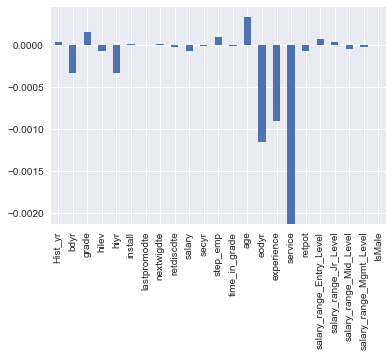

In [109]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=DF_Reg3.columns)
weights.plot(kind='bar')

Looking at the SVM for rno_000001, the confusion matrix leads us to believe that this measure is not very accurate. However, investigating the weights, we can see that the 'Service', 'EODyr' and 'Experience' variables are very important for the SVM Diversity Classifier. 

# Modeling and Evaluation 4
---

<span style="color:red">10 Points - Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model. </span>

### Results for salary range jr level

In [137]:
print ('KNN Junior Salary Range Accuracy with 10 splits', KNNs_total_accuracy)
print(KNNs_conf)
print('--------------------------------------')
print ('Random Forest Salary_Range_Jr_level Accuracy', RFs_total_accuracy)
print (RFs_conf)
print('--------------------------------------')
print('SVM Junior Salary Range accuracy:', SVMs_acc2)
print(SVMs_conf2)

KNN Junior Salary Range Accuracy with 10 splits 0.996432143785
[[81417   273]
 [  180 45097]]
--------------------------------------
Random Forest Salary_Range_Jr_level Accuracy 1.0
[[81690     0]
 [    0 45277]]
--------------------------------------
SVM Junior Salary Range accuracy: 1.0
[[20385     0]
 [    0 11357]]


In [ ]:
from sklearn import metrics as mt

freq_infreq_threshold = 40

# get various measures of performance
total_accuracy = mt.accuracy_score(y, yhat)

prec_for_freq_classes = []
recall_for_infreq_classes = []
rec_tot = []
prec_tot = []

for cls in np.unique(y):
    idx = (y==cls) # get classes
    ytmp_actual = np.zeros(y.shape) # make binary class problem
    ytmp_actual[idx] = 1 # set the instances for this specific class
    
    ytmp_predicted = np.zeros(y.shape) # binary prediction array
    ytmp_predicted[yhat==cls] = 1
    
    num_in_class = sum(idx)
    
    rec = mt.recall_score(ytmp_actual, ytmp_predicted)
    prec = mt.precision_score(ytmp_actual, ytmp_predicted)
    rec_tot.append(rec)
    prec_tot.append(prec)
    
    if num_in_class < freq_infreq_threshold:
        recall_for_infreq_classes.append(rec)
    elif num_in_class >= freq_infreq_threshold:
        prec_for_freq_classes.append(prec)
        
print ('Total Accuracy:',total_accuracy)
print ('Number of infrequent classes:',len(recall_for_infreq_classes), 
       'with average recall of:', np.mean(recall_for_infreq_classes))
print ('Number of frequent classes:',len(prec_for_freq_classes), 
       'with average precision of:',np.mean(prec_for_freq_classes))

In [ ]:
# But we can really summarize this data much better than this. 
# How about looking at more statistics of the precision and recall for each class?

import seaborn as sns
sns.set_palette("dark")

plt.boxplot([rec_tot, prec_tot, recall_for_infreq_classes,prec_for_freq_classes],labels=['true positive','false positive','true negative','false negative'])
plt.ylim([0,1])
plt.show()

Based on the ACCURACY score, we can see that the most accurate measure for the Junior Salary Range Classifier was the Random Forest and the SVM. Looking at the confusion matrix boxplot above, Random Forest and SVM have are the most accurate but have the worst confusion matrix results. Therefore, we advocate the use of KNN. This will still give an accuracy of 99% with a better confusion matrix result.

#### Results for the rno_00001 classification

In [ ]:
print ('KNN Adversity Accuracy with 10 splits', KNNr2_total_accuracy2)
print(KNNr2_conf2)
print('--------------------------------------')
print ('Random Forest Diversity Accuracy', RFr_total_accuracy2)
print (RFr_conf2)
print('--------------------------------------')
print('SVM Diversity accuracy:', SVMr_acc2 )
print(SVMr_conf2)

In [ ]:
from sklearn import metrics as mt

freq_infreq_threshold = 40

# get various measures of performance
total_accuracy2 = mt.accuracy_score(y2, yhat2)

prec_for_freq_classes2 = []
recall_for_infreq_classes2 = []
rec_tot2 = []
prec_tot2 = []

for cls in np.unique(y2):
    idx = (y2==cls) # get classes
    ytmp_actual2 = np.zeros(y2.shape) # make binary class problem
    ytmp_actual2[idx] = 1 # set the instances for this specific class
    
    ytmp_predicted2 = np.zeros(y2.shape) # binary prediction array
    ytmp_predicted2[yhat2==cls] = 1
    
    num_in_class2 = sum(idx)
    
    rec2 = mt.recall_score(ytmp_actual2, ytmp_predicted2)
    prec2 = mt.precision_score(ytmp_actual2, ytmp_predicted2)
    rec_tot2.append(rec2)
    prec_tot2.append(prec2)
    
    if num_in_class2 < freq_infreq_threshold:
        recall_for_infreq_classes2.append(rec2)
    elif num_in_class2 >= freq_infreq_threshold:
        prec_for_freq_classes2.append(prec2)
        
print ('Total Accuracy:',total_accuracy2)
print ('Number of infrequent faces:',len(recall_for_infreq_classes2), 
       'with average recall of:', np.mean(recall_for_infreq_classes2))
print ('Number of frequent faces:',len(prec_for_freq_classes2), 
       'with average precision of:',np.mean(prec_for_freq_classes2))

In [ ]:
# But we can really summarize this data much better than this. 
# How about looking at more statistics of the precision and recall for each class?

import seaborn as sns
sns.set_palette("dark")

plt.boxplot([rec_tot2, prec_tot2, recall_for_infreq_classes2, prec_for_freq_classes2],labels=['true positive','false positive','true negative','false negative'])
plt.ylim([0,1])
plt.show()

Based on the ACCURACY score, we can see that the most accurate measure for the Diversity Classifier was the Random Forest. Random forests showed an accuracy score of 78%. This measure had a solid confusion matrix so we advocate that this test be the best choice.

# Modeling and Evaluation 5
---

10 Points - Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

#### Model evaluation for Junior Salary Range

In [ ]:
import seaborn as sns
sns.set_palette("dark")
# code manipulated from http://scikit-learn.org/stable/auto_examples/plot_roc.html
from sklearn.preprocessing import label_binarize

# Compute ROC curve for a subset of interesting classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in np.unique(y):
    fpr[i], tpr[i], _ = mt.roc_curve(y, yhat_score[:, i], pos_label=i)
    roc_auc[i] = mt.auc(fpr[i], tpr[i])

for i in np.random.permutation(60)[0:6]:
    plt.plot(fpr[i], tpr[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(i, sum(y==i), roc_auc[i]))

plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Model Evaluation for RNO_00001

In [ ]:
import seaborn as sns
sns.set_palette("dark")
# code manipulated from http://scikit-learn.org/stable/auto_examples/plot_roc.html
from sklearn.preprocessing import label_binarize

# Compute ROC curve for a subset of interesting classes
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
for i in np.unique(y2):
    fpr2[i], tpr[i], _ = mt.roc_curve(y2, yhat2[:, i], pos_label=i)
    roc_auc2[i] = mt.auc(fpr2[i], tpr2[i])

for i in np.random.permutation(60)[0:6]:
    plt.plot(fpr2[i], tpr2[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                   ''.format(i, sum(y2==i), roc_auc2[i]))

plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Looking at the ROC curve for Junior level salary range we can see the area under the curve has minimal false negatives and false positives for the KNN model. 

Looking at the ROC curve for the diversity classification we can see the area under the curve has minimal false negatives and false positives for the random forest model. 

# Modeling and Evaluation 6
---

<span style="color:red">
10 Points - Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.
</span>

Based on the SVM weights output, we know that for the Junior Level Salary Range, the most important variables for analysis were Grade, Service, Last Promoted Date, Step_Emp, and Retdiscdte are the biggest predictors of the Junior Salary Range Level classification. It is interesting to note that in the logistic regression model, 'grade' was not a relevant variable. However, in the SVM model we can see that 'grade' has the largest weight. 

We suspect that this is because Logistic Regression aims to fit the data points along a continuous function so the 'grade' variable passes into the model with minimal significance. However, for Support Vector Machines, it is easy to separate the data into classes since we can assume most junior salary range level employees are probably also defined by their 'grade' level. We initially defined the categories as follows.

'Entry_Level' : $0-50,000
'Jr_Level' : $50,000-100,000
'Mid_Level' : $100,000-135,000
'Mgmt_Level' : $135,000-150,000

We know from NASA documentation that pay level is defined by a combination of 'grade', 'step', and 'service'. Knowing this, it makes sense that the biggest predictors of Junior Salary Range are 'grade', 'step' and 'service'. 

Looking at the SVM weights output for the diversity classifier, most of the variables had minimal effect on the diversity classification. However, 'Service', 'EODyr' and 'Experience' carried the largest amount of weight with Service weighting in at -0.002. We noticed that these variables are all time based. We suspect this may have something to do with their negative correlation. 

# Deployment
---


<span style="color:red">5 Points - How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? </span>

All Federal Agencies are required to use and store the data elements defined by Office of Personnel Management (OPM). The data elements are defined in the following OPM website: https://www.opm.gov/policy-data-oversight/pay-leave/salaries-wages/salary-tables/datadictionary.aspx

We strongly recommend all Human Resources and Workforce Planning offices of the United States Government, especially the Office of Personnel Management (OPM) will benefit from the use of the models and analysis contained in the document. 

# Exceptional Work
---

Classification Using Gradient Boosting

In [ ]:
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [ ]:
train = DF_NoT.copy()

In [ ]:
target = 'rno_000001' #Binary for being White or not.

In [ ]:
train[target].value_counts()

### Define a function for modeling and cross-validation
This function will do the following:
1. fit the model
2. determine training accuracy
3. determine training AUC
4. determine testing AUC
5. perform CV is performCV is True
6. plot Feature Importance if printFeatureImportance is True

Source code from https://github.com/aarshayj/Analytics_Vidhya/blob/master/Articles/Parameter_Tuning_GBM_with_Example/GBM%20model.ipynb

In [ ]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['rno_000001'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['rno_000001'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['rno_000001'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['rno_000001'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
                
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

### Model Baseline

In [ ]:
#Choose all predictors except the target variable, in this case 'rno_000001'
predictors = [x for x in train.columns if x not in [target]]
predictors

In [ ]:
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)

Describe what you see above ^

### Tune the parameters

In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target]]
param_test1 = {'n_estimators':[50,60,70,80,90,100, 120, 140, 160]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=1, min_samples_split=500,min_samples_leaf=50,max_depth=8, max_features='sqrt', subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

In [ ]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

REASONS


In [ ]:
#Grid seach on subsample and max_features
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,
                                                max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])

In [ ]:

gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:

#Grid seach on subsample and max_features
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,
                                                    max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])

In [ ]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [ ]:
modelfit(gsearch3.best_estimator_, train, test, predictors)

In [ ]:

#Grid seach on subsample and max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, 
                            min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10),
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])

In [ ]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
#Grid seach on subsample and max_features
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, 
                            min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10, max_features=7),
                       param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])

In [ ]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=9, min_samples_split=1200, 
                                         min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7)
modelfit(gbm_tuned_1, train, test, predictors)

10 Points - You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

# Appendix